    bp (Diastolic) bp limit             sg     al rbc     su pc pcc ba  \
0                0        0  1.019 - 1.021  1 - 1   0    < 0  0   0  0   
1                0        0  1.009 - 1.011    < 0   0    < 0  0   0  0   
2                0        0  1.009 - 1.011    ≥ 4   1    < 0  1   0  1   
3                1        1  1.009 - 1.011  3 - 3   0    < 0  0   0  0   
4                0        0  1.015 - 1.017    < 0   0    < 0  0   0  0   
..             ...      ...            ...    ...  ..    ... ..  .. ..   
195              1        2  1.019 - 1.021    < 0   0    < 0  0   0  0   
196              0        0  1.019 - 1.021    < 0   0    < 0  0   0  0   
197              1        1        ≥ 1.023    < 0   0    < 0  0   0  0   
198              1        1        ≥ 1.023    < 0   0    < 0  0   0  0   
199              1        1  1.009 - 1.011  2 - 2   0  2 - 2  0   0  0   

           bgr  ... htn dm cad appet pe ane                grf stage affected  \
0        < 112  ...   0  0   0

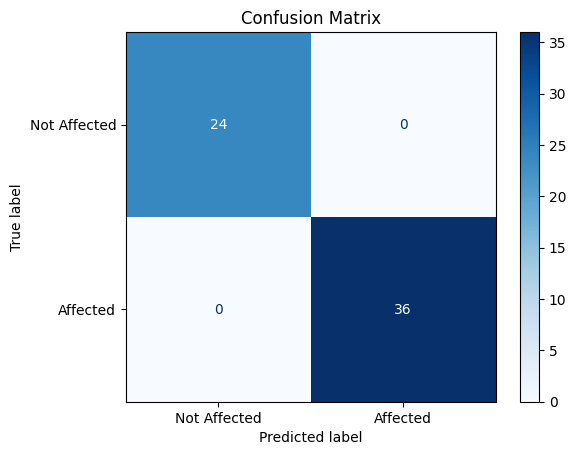


Classification Report:
               precision    recall  f1-score   support

Not Affected       1.00      1.00      1.00        24
    Affected       1.00      1.00      1.00        36

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



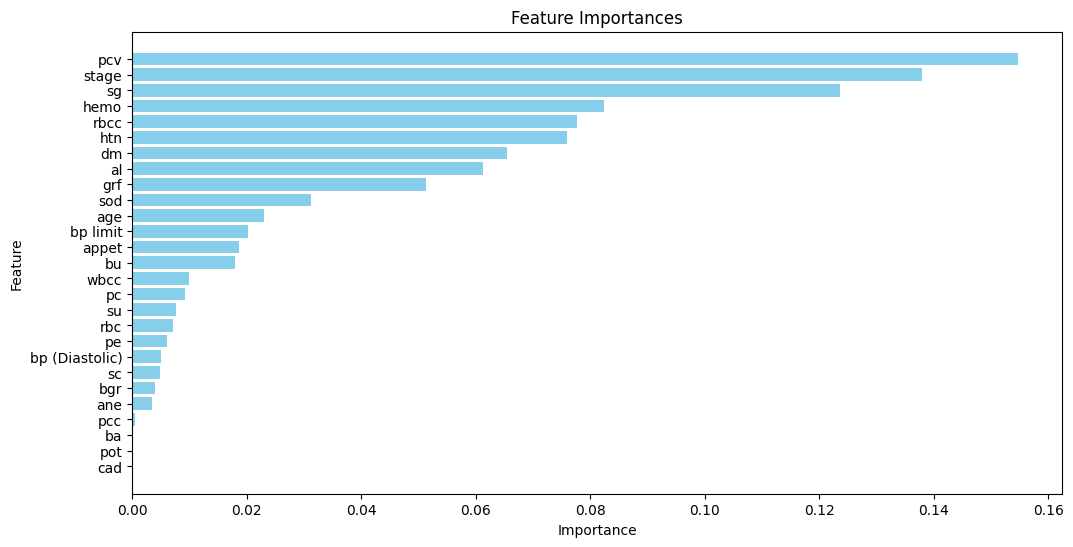


Top Features:
    Feature  Importance
15     pcv    0.154638
25   stage    0.137855
2       sg    0.123565
14    hemo    0.082417
16    rbcc    0.077651
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Model Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess the dataset
def preprocess_data(file_path):
    df = pd.read_csv(r"C:\Users\Farru\Downloads\ckd-dataset-v2.csv")
    # Remove unnecessary rows and columns
    df_cleaned = df.drop(index=[0, 1]).reset_index(drop=True)
    df_cleaned = df_cleaned.drop(columns=["class"], errors="ignore")

    print(df_cleaned)
    # Set features and target
    target = "affected"
    features = df_cleaned.drop(columns=[target], errors="ignore")
    target_values = df_cleaned[target]

    # Encode categorical variables
    features_encoded = features.apply(LabelEncoder().fit_transform)
    target_encoded = LabelEncoder().fit_transform(target_values)

    return features_encoded, target_encoded

# Train and evaluate model
def train_evaluate_model(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train model
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["Not Affected", "Affected"])

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                          display_labels=["Not Affected", "Affected"], cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    return clf, report

# Feature importance analysis
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

    return feature_importance_df

# Hyperparameter tuning
def optimize_hyperparameters(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    clf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                               cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_, grid_search.best_params_

# Main workflow
# Corrected file path
file_path = r"C:\Users\Farru\Downloads\ckd-dataset-v2.csv"
features_encoded, target_encoded = preprocess_data(file_path)
clf, report = train_evaluate_model(features_encoded, target_encoded)
print("\nClassification Report:\n", report)

# Feature importance visualization
feature_names = features_encoded.columns
feature_importance_df = plot_feature_importances(clf, feature_names)
print("\nTop Features:\n", feature_importance_df.head())

# Optional: Hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.3, random_state=42)
best_model, best_params = optimize_hyperparameters(X_train, y_train)
print("\nBest Model Parameters:\n", best_params)